In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

/home/eigensim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# directory variables (fixed)

dataLoc = '../_data/'
trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
testfile = 'test_clean.csv'
old_testfile = 'test.csv'
train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'
disturb_file = 'train_03_997_disturb.csv'

In [3]:
#csv 로드

disturb_df = pd.read_csv(dataLoc + disturb_file)
print(disturb_df.shape)
disturb_df.tail()

(697516, 5)


,Unnamed: 0,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
697511,701773,1,1,0,280
697512,701774,2,5,0,408
697513,701775,1,1,0,736
697514,701776,2,5,0,849
697515,701777,1,1,0,1294


In [6]:
#train.csv

orig_df = pd.read_csv(dataLoc + old_trainfile,
                     infer_datetime_format=True,
                     parse_dates=['pickup_datetime'])
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,N,280
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,N,408
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,N,736
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,N,849
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,N,1294


In [7]:
orig_df['store_and_fwd_flag'].replace(['N', 'Y'], [0, 1], inplace = True) #inplace=True로 데이터프레임에 입력됨
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,0,280
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,0,408
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,0,736
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,0,849
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,0,1294


In [ ]:
orig_df.shape

In [ ]:
print(np.percentile(orig_df['trip_duration'], 0))
print(np.percentile(orig_df['pickup_longitude'], 0))
print(np.percentile(orig_df['pickup_latitude'], 0))
print(np.percentile(orig_df['dropoff_longitude'], 0))
print(np.percentile(orig_df['dropoff_latitude'], 0))

In [ ]:
print(np.percentile(orig_df['trip_duration'], 100))
print(np.percentile(orig_df['pickup_longitude'], 100))
print(np.percentile(orig_df['pickup_latitude'], 100))
print(np.percentile(orig_df['dropoff_longitude'], 100))
print(np.percentile(orig_df['dropoff_latitude'], 100))

In [ ]:
lower_p_lng = np.percentile(orig_df['pickup_longitude'], 0.3)
upper_p_lng = np.percentile(orig_df['pickup_longitude'], 99.7)

lower_p_lat = np.percentile(orig_df['pickup_latitude'], 0.3)
upper_p_lat = np.percentile(orig_df['pickup_latitude'], 99.7)

lower_d_lng = np.percentile(orig_df['dropoff_longitude'], 0.3)
upper_d_lng = np.percentile(orig_df['dropoff_longitude'], 99.7)

lower_d_lat = np.percentile(orig_df['dropoff_latitude'], 0.3)
upper_d_lat = np.percentile(orig_df['dropoff_latitude'], 99.7)

lower_dur = np.percentile(orig_df['trip_duration'], 0.3)
upper_dur = np.percentile(orig_df['trip_duration'], 99.7)

In [8]:
orig_df['store_and_fwd_flag_binom'] = orig_df['store_and_fwd_flag']
del orig_df['store_and_fwd_flag']
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_binom
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,280,0
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,408,0
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,736,0
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,849,0
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,1294,0


In [9]:
for i in range(5, 9+1):
    lower = np.percentile(orig_df.iloc[:, i], 0.3)
    upper = np.percentile(orig_df.iloc[:, i], 99.7)
    filtered_df = orig_df[(orig_df.iloc[:, i] > lower) & (orig_df.iloc[:, i] < upper)]
    
# pickup, dropoff, duration 의 각 상위 하위 0.3% 제거

In [10]:
print(filtered_df.shape)
filtered_df.tail()

(697516, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_binom
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,280,0
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,408,0
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,736,0
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,849,0
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,1294,0


In [11]:
#pickup과 dropoff 사이의 직선 거리

def lineal_dist(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    return ((dropoff_longitude-pickup_longitude)**2 + (dropoff_latitude-pickup_latitude)**2) ** 0.5

df_temp = filtered_df.copy()

df_temp['lineal_dist'] = np.vectorize(lineal_dist)(\
                df_temp['pickup_longitude'], df_temp['pickup_latitude'], df_temp['dropoff_longitude'], df_temp['dropoff_latitude'])

df_temp.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_binom,lineal_dist
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,280,0,0.009103
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,408,0,0.022726
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,736,0,0.025557
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,849,0,0.118097
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,1294,0,0.040151


In [13]:
disturb_df = df_temp[['vendor_id', 'passenger_count', 'store_and_fwd_flag_binom', 'lineal_dist', 'trip_duration']] #selected columns

disturb_df.rename(columns = {'store_and_fwd_flag_binom' : 'store_and_fwd_flag', 'lineal_dist' : 'lineal_distance'}, inplace = True)
#renamed columns

print(disturb_df.shape)

disturb_df.tail()

(697516, 5)


/home/eigensim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,vendor_id,passenger_count,store_and_fwd_flag,lineal_distance,trip_duration
701773,1,1,0,0.009103,280
701774,2,5,0,0.022726,408
701775,1,1,0,0.025557,736
701776,2,5,0,0.118097,849
701777,1,1,0,0.040151,1294


In [14]:
disturb_df.to_csv('../_data/train_03_997_disturb.csv')

In [ ]:
# 앞으로 csv로 로드

# disturb_df = pd.read_csv(dataLoc + disturb_file)
# print(disturb_df.shape)
# disturb_df.tail()

In [15]:
x = disturb_df.iloc[:, :]
y = disturb_df.iloc[:, :]

disturb_xcols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'lineal_distance']

In [ ]:
print(plt.style.available)

In [ ]:
#승객 수에 0이 있는지 확인

disturb_df['passenger_count'].value_counts()

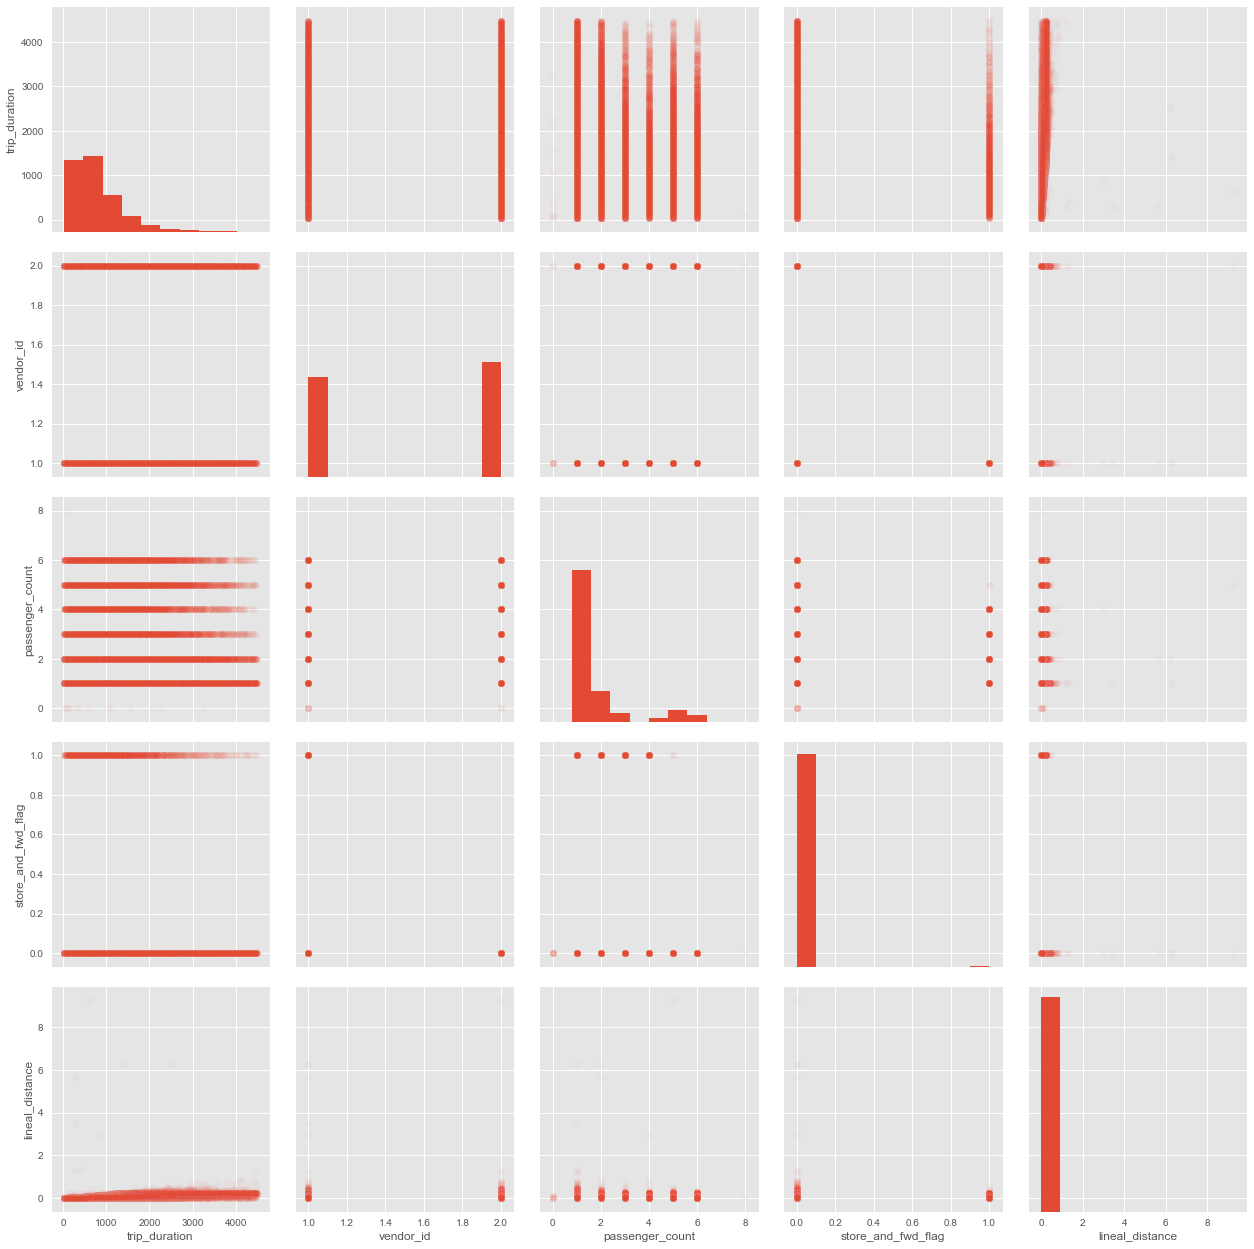

In [16]:
with plt.style.context(('ggplot')): #~.stye.context = Temporary styling
    sns_plot = sns.pairplot(pd.concat([y.trip_duration, x[disturb_xcols[:]]], axis=1), size=3.5, plot_kws={"s": 50, 'alpha' : 0.03}) 
plt.show()

In [17]:
y = disturb_df.trip_duration
X = disturb_df[disturb_xcols[:]]
X = sm.add_constant(X)
X.tail()

,const,vendor_id,passenger_count,store_and_fwd_flag,lineal_distance
701773,1.0,1,1,0,0.009103
701774,1.0,2,5,0,0.022726
701775,1.0,1,1,0,0.025557
701776,1.0,2,5,0,0.118097
701777,1.0,1,1,0,0.040151


In [19]:
disturb = sm.OLS(y, X)

disturb = disturb.fit()

disturb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.738e+05
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:56:23   Log-Likelihood:            -5.2091e+06
No. Observations:              697516   AIC:                         1.042e+07
Df Residuals:                  697511   BIC:                         1.042e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                474.4844      1.705    278.355      0.000     471.143     477.825
vendor_id              0.7661      1.066      0.718      0.473      -1.324       2.856
passenger_count        2.3010      0.402      5.727      0.000       1.514       3.089
store_and_fwd_flag    47.9264      6.929      6.917      0.000      34.346      61.507
lineal_distance     9402.5649     11.284    833.285      0.000    9380.449    9424.681
==============================================================================
Omnibus:                  1640857.428   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     453407184699.138
Skew:                         -22.218   Prob(JB):                         0.00
Kurtosis:                    3952.528   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""